# Classification models

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('new_dataset.csv')

data.head()


,original_title,overview,original_language,vote_average,vote_count,popularity
0,The Super Mario Bros. Movie,"While working underground to fix a water main,...",en,7.8,3432,5203.400
1,Fast X,Over many missions and against impossible odds...,en,6.9,449,4334.616
2,John Wick: Chapter 4,"With the price on his head ever increasing, Jo...",en,8.0,1861,4746.497
3,Sisu,"Deep in the wilderness of Lapland, Aatami Korp...",Others,7.5,391,2367.432
4,Evil Dead Rise,Three siblings find an ancient vinyl that give...,en,7.1,1292,2301.350


# Test all corr between predictior and response(original_language).


# The categorical variables:

In [4]:
# 1
#Cross tabulation between original_language and original_title
CrosstabResult=pd.crosstab(index=data['original_language'],columns=data['original_title'])
#print(CrosstabResult)
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.4787725733617611


In [5]:
# 2
#Cross tabulation between original_language and overview
CrosstabResult=pd.crosstab(index=data['original_language'],columns=data['overview'])
#print(CrosstabResult)
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.4787725733617652


# The numeric variables:

In [6]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between vote_count and original_language
# Assumption(H0) is that original_language and vote_count are NOT correlated
 
# Finds out the vote_count data for each original_language as a list
CategoryGroupLists=data.groupby('original_language')['vote_count'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  5.44036800280951e-29


In [7]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between original_language and popularity
# Assumption(H0) is that popularity and original_language are NOT correlated
 
# Finds out the popularity data for each original_language as a list
CategoryGroupLists=data.groupby('original_language')['popularity'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.7671277942854083


In [8]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between vote_count and original_language
# Assumption(H0) is that original_language and vote_count are NOT correlated
 
# Finds out the vote_average data for each original_language as a list
CategoryGroupLists=data.groupby('original_language')['vote_average'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  3.514361218871601e-05


# count the values of original_language:

In [9]:
print(data['original_language'].value_counts())

en        727
Others     88
ja         70
ko         39
es         37
Name: original_language, dtype: int64


Each original_language has an uneven number of observations, meaning that our dataset is not balanced!
so to make it more balanced merge all the languages that have less than 30 counts in one type "Others".

to get more balanced datasets to makes better classification models

In [10]:
#data['original_language'] = data['original_language'].replace(['fr', 'it','zh','cn','ru','pl','de','no','nl','th','eu','eu','uk','fi','ro','is','te','id','tl','da','tr','sv'],'Others')

#csv_data = data.to_csv('new_dataset.csv' ,index=False)  # to change in dataset too
data.head()

,original_title,overview,original_language,vote_average,vote_count,popularity
0,The Super Mario Bros. Movie,"While working underground to fix a water main,...",en,7.8,3432,5203.400
1,Fast X,Over many missions and against impossible odds...,en,6.9,449,4334.616
2,John Wick: Chapter 4,"With the price on his head ever increasing, Jo...",en,8.0,1861,4746.497
3,Sisu,"Deep in the wilderness of Lapland, Aatami Korp...",Others,7.5,391,2367.432
4,Evil Dead Rise,Three siblings find an ancient vinyl that give...,en,7.1,1292,2301.350


In [11]:
print(data['original_language'].value_counts())

en        727
Others     88
ja         70
ko         39
es         37
Name: original_language, dtype: int64


The english language is the most common language then the Japanese language.

# Take a Predictions which have a correlation with the response

In [12]:
df1=pd.DataFrame(data, columns=['original_language','vote_average','vote_count','popularity'])

In [13]:
df1.head()

,original_language,vote_average,vote_count,popularity
0,en,7.8,3432,5203.400
1,en,6.9,449,4334.616
2,en,8.0,1861,4746.497
3,Others,7.5,391,2367.432
4,en,7.1,1292,2301.350


## Univariate analysis:

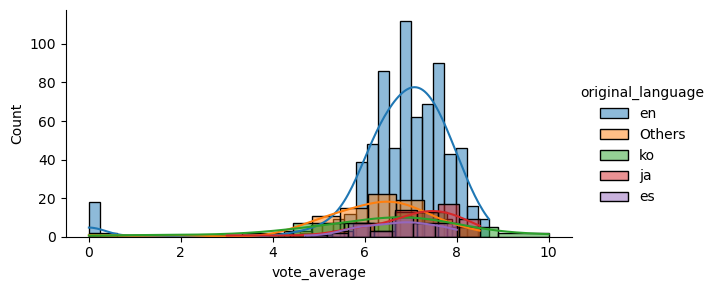

In [14]:
sns.FacetGrid(df1,hue='original_language',height=3, aspect=2).map(sns.histplot,"vote_average", kde=True).add_legend()

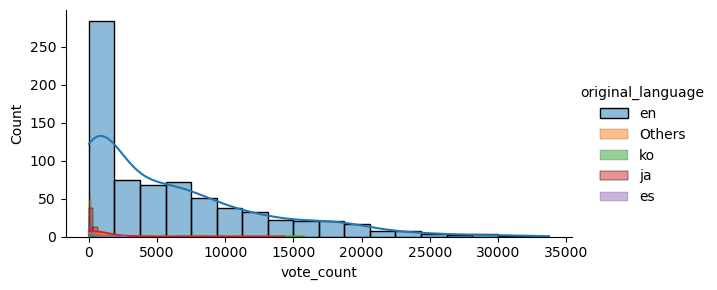

In [15]:
sns.FacetGrid(df1,hue='original_language',height=3, aspect=2).map(sns.histplot,"vote_count", kde=True).add_legend()

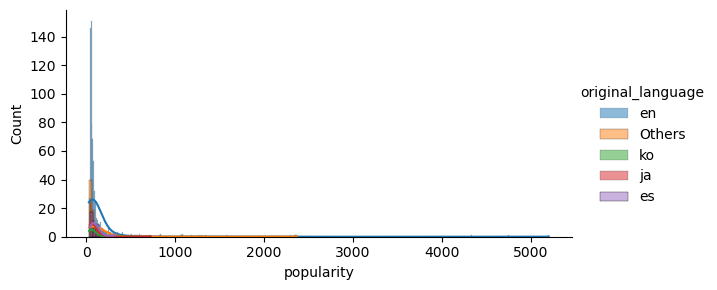

In [16]:
sns.FacetGrid(df1,hue='original_language',height=3, aspect=2).map(sns.histplot,"popularity", kde=True).add_legend()

<Axes: xlabel='original_language', ylabel='popularity'>

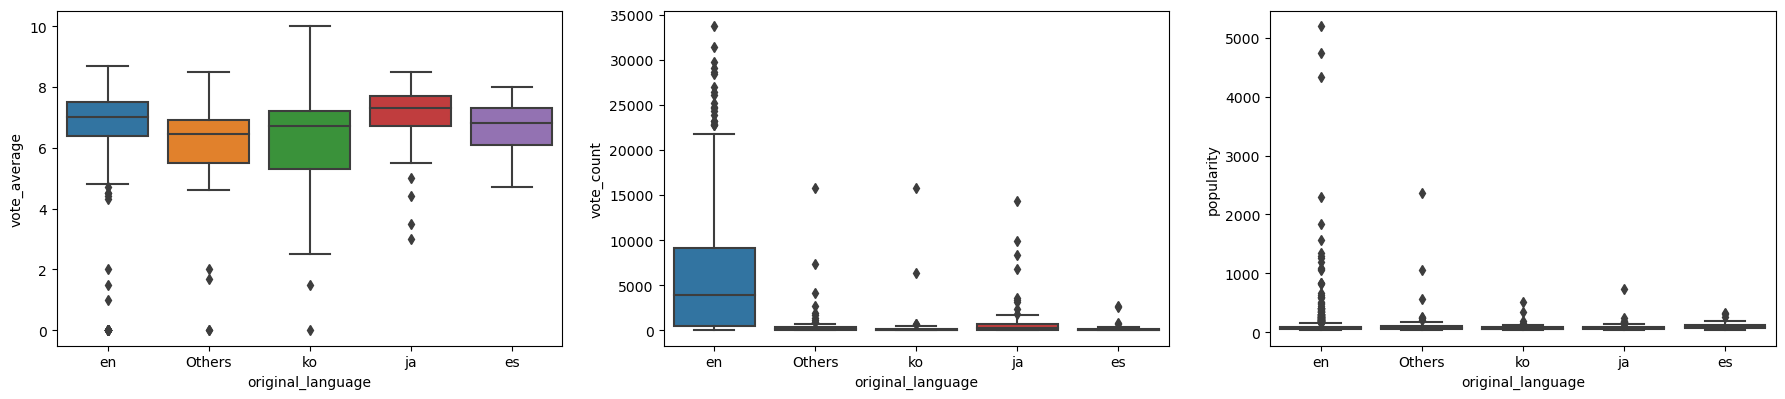

In [17]:
fig = plt.figure(figsize=(30, 20))
fig.add_subplot(4,4,1)
sns.boxplot(x='original_language',y="vote_average",data=df1)
fig.add_subplot(4,4,2)
sns.boxplot(x='original_language',y="vote_count",data=df1)
fig.add_subplot(4,4,3)
sns.boxplot(x='original_language',y="popularity",data=df1)

## Multivariate analysis

<Figure size 1500x800 with 0 Axes>

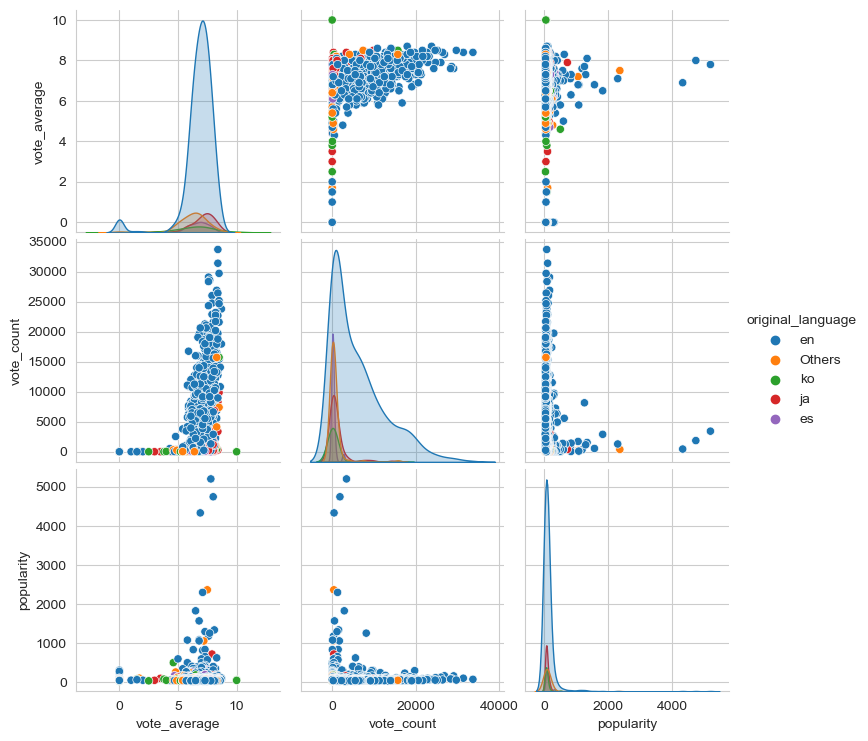

In [18]:
fig = plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.pairplot(df1,hue='original_language');
plt.show()

# Split the data into test and train set

In [19]:
X = df1.drop('original_language',axis=1)  #Predictors
y = df1['original_language']              #Response


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) #80% training, 20% testing   

print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)

#split 75% 25% 

(720, 3) (241, 3) (720,) (241,)


# Multi-class classification using Logistic Regression:

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


/Users/latifaia/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#Make prediction for the test data
y_pred= logreg.predict(X_test)
#print(y_pred)

In [23]:
LR_prediction = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test.tolist(), LR_prediction.tolist())
print(confusion_matrix)

[[  0  21   0   0   0]
 [  0 188   0   0   0]
 [  0   8   0   0   0]
 [  0  14   0   0   0]
 [  0  10   0   0   0]]


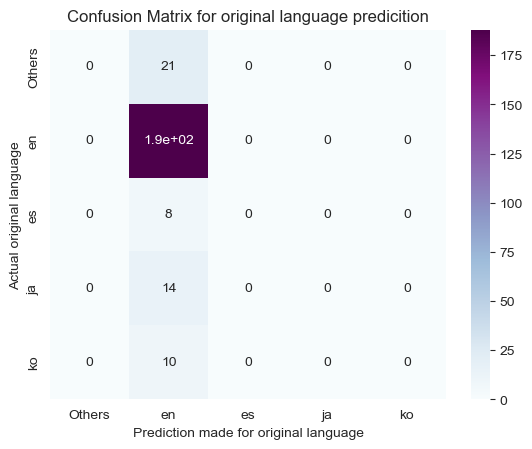

In [24]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for original language predicition');
ax.set_xlabel('Prediction made for original language')
ax.set_ylabel('Actual original language');

##labels 
ax.xaxis.set_ticklabels(['Others','en','es','ja','ko'])
ax.yaxis.set_ticklabels(['Others','en','es','ja','ko'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [25]:
print(classification_report(y_test, LR_prediction))

              precision    recall  f1-score   support

      Others       0.00      0.00      0.00        21
          en       0.78      1.00      0.88       188
          es       0.00      0.00      0.00         8
          ja       0.00      0.00      0.00        14
          ko       0.00      0.00      0.00        10

    accuracy                           0.78       241
   macro avg       0.16      0.20      0.18       241
weighted avg       0.61      0.78      0.68       241



/Users/latifaia/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/latifaia/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/latifaia/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


since we know that 

f1-score , recall ,precision: 0 worst , 1 best.
    
support: number of each class.  

the english lanuage prediction is the best one.

# Multi-class classification using SVM:

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

SVM = SVC(gamma='auto')
SVM.fit(X_train, y_train)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(SVM.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.78


In [27]:
#Make prediction for the test data
y_pred= SVM.predict(X_test)
#print(y_pred)

In [28]:
SVM_prediction = SVM.predict(X_test)
confusion_matrix = confusion_matrix(y_test, SVM_prediction)
print(confusion_matrix)

[[  0  21   0   0   0]
 [  0 188   0   0   0]
 [  0   8   0   0   0]
 [  0  14   0   0   0]
 [  0  10   0   0   0]]


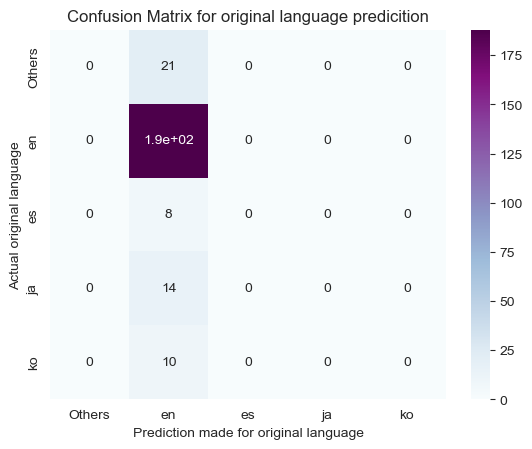

In [29]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for original language predicition');
ax.set_xlabel('Prediction made for original language')
ax.set_ylabel('Actual original language');

##labels 
ax.xaxis.set_ticklabels(['Others','en','es','ja','ko'])
ax.yaxis.set_ticklabels(['Others','en','es','ja','ko'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
print(classification_report(y_test, SVM_prediction))

              precision    recall  f1-score   support

      Others       0.00      0.00      0.00        21
          en       0.78      1.00      0.88       188
          es       0.00      0.00      0.00         8
          ja       0.00      0.00      0.00        14
          ko       0.00      0.00      0.00        10

    accuracy                           0.78       241
   macro avg       0.16      0.20      0.18       241
weighted avg       0.61      0.78      0.68       241



/Users/latifaia/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/latifaia/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/latifaia/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Multi-class classification using 5 Models:
iii. Estimate how good your model is. Use various measures.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #Repeats Stratified K-Fold n times
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) #the mean accuracy for each model and the SD

LR: 0.748611 (0.004167)
KNN: 0.730556 (0.018840)
CART: 0.661111 (0.026498)
NB: 0.509722 (0.035164)
SVM: 0.747222 (0.005556)


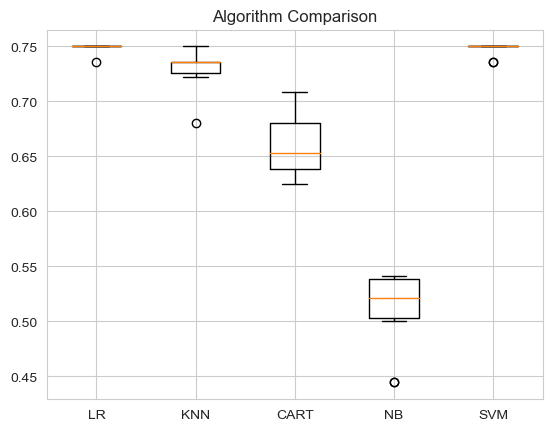

In [32]:
# Compare models' accuracy 
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Questions :

### Q1:Does the popularity of top rated movies affect the chance to be from a particular language?

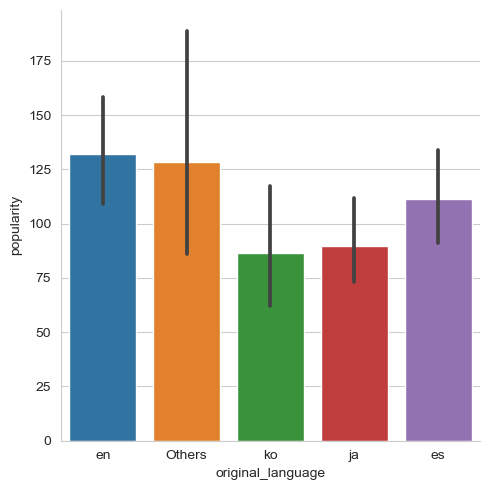

In [33]:
#df1.plot.bar(x = 'original_language', y = 'popularity', rot = 40)
sns.catplot(x="original_language", y="popularity", kind="bar", data=df1);  

### Q2:what are the most frequent language from the top rated movies?

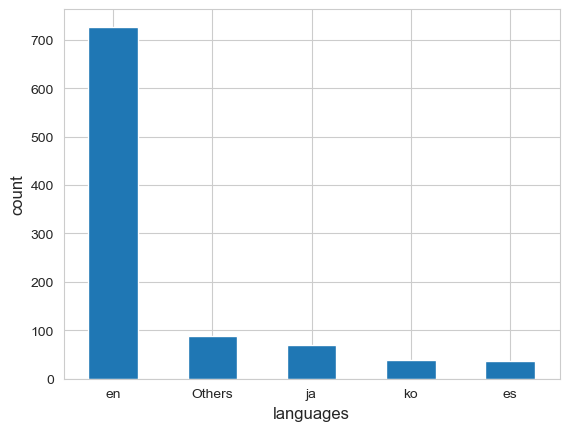

In [37]:
df1.original_language.value_counts().plot(kind='bar')
plt.xticks(rotation=0);
plt.xlabel('languages', fontsize=12);
plt.ylabel('count', fontsize=12);

### Q3:What is the language that got the highest  Vote Count? 

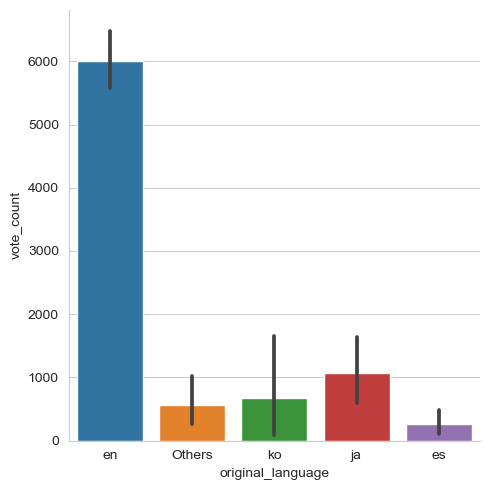

In [38]:
sns.catplot(x="original_language", y="vote_count", kind="bar", data=df1);

### Q4:is it true that movies with the highest vote count has the highest popularity ?

<Axes: xlabel='vote_count', ylabel='popularity'>

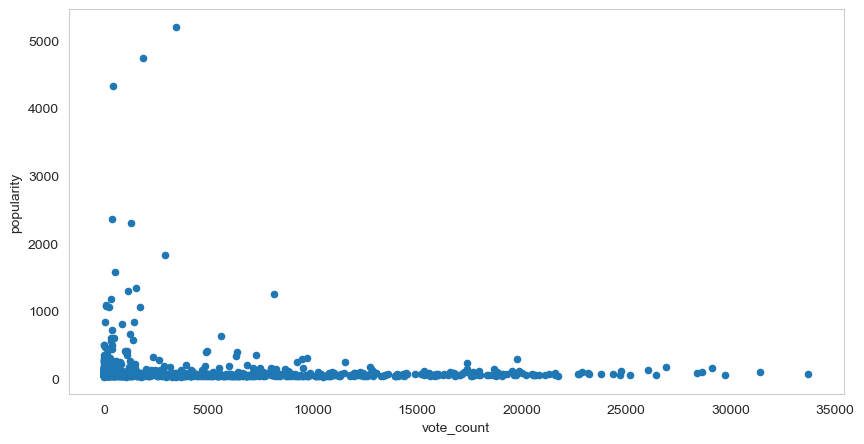

In [39]:
df1.plot.scatter(x='vote_count', y='popularity', figsize=(10,5), grid=False)

### Q5:what is the language that got the heighst rating average ?

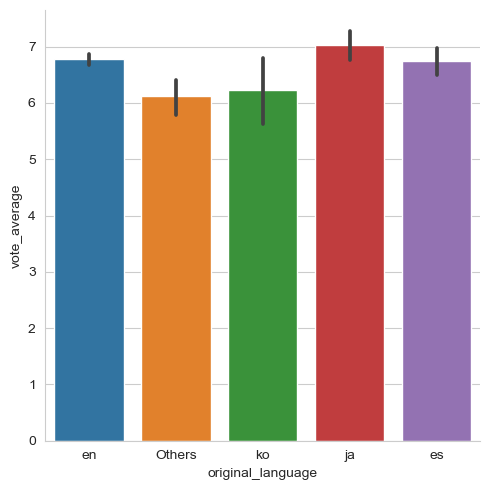

In [40]:
#df1.plot.scatter(x='vote_average', y='popularity', figsize=(10,5), grid=False)
sns.catplot(x="original_language", y="vote_average", kind="bar", data=df1);

# References